模型准确率: 0.85


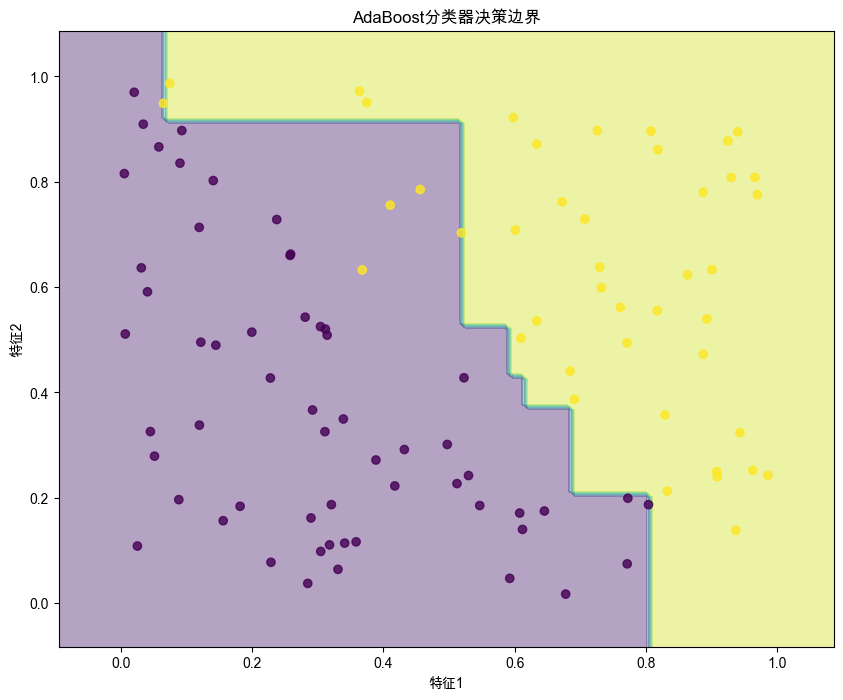

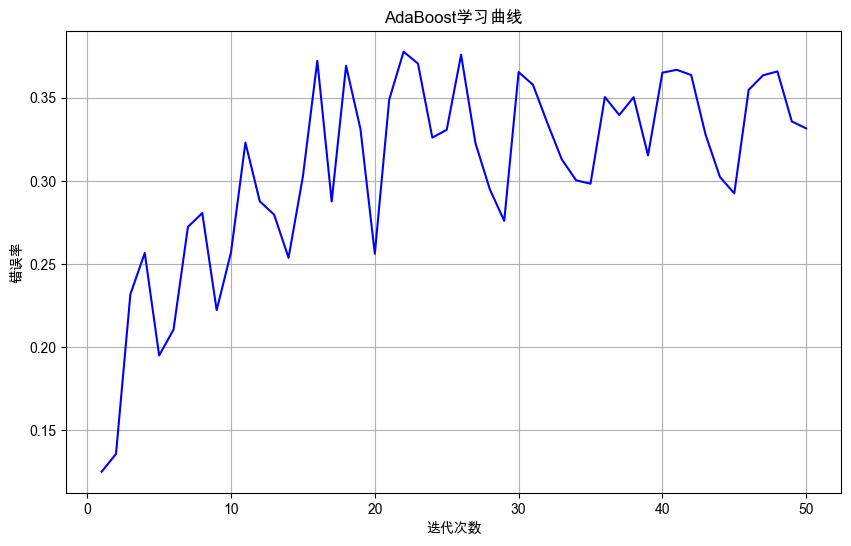

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.family'] = 'Arial Unicode MS'

# 生成示例数据
np.random.seed(42)
X = np.random.rand(100, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建基分类器（决策树）
base_estimator = DecisionTreeClassifier(max_depth=1)

# 创建AdaBoost分类器
ada_boost = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

# 训练模型
ada_boost.fit(X_train, y_train)

# 预测
y_pred = ada_boost.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'模型准确率: {accuracy:.2f}')

# 可视化决策边界
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = ada_boost.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.title('AdaBoost分类器决策边界')
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.show()

# 绘制学习曲线
estimator_errors = ada_boost.estimator_errors_
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(estimator_errors) + 1), estimator_errors, 'b-')
plt.title('AdaBoost学习曲线')
plt.xlabel('迭代次数')
plt.ylabel('错误率')
plt.grid(True)
plt.show()
